# Markowitz Model
Python implementation of the markowitz model, given expected returns and covariance matrix.

In [1]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import cvxpy as cp
import yfinance as yf
import plotly.express as px
from markowitz import *

## Model Inputs
Assuming the expected returns are equal to the average of the historical returns is indeed erroneus. It suggests trend-stationary time series and we know that even if we accept the weiner process assumption about the prices, the parameters of the process can vary across different time windows. For simplicity and need for inputs to the model, we will use historical moments.

In [2]:
get_history = lambda ticker: yf.Ticker(ticker).history("1y")["Close"].pct_change(1).to_numpy()[5:]

s1 = get_history("SASA.IS")
s2 = get_history("QUAGR.IS")
s3 = get_history("SASA.IS")
s4 = get_history("SAHOL.IS")
s5 = get_history("YKBNK.IS")

In [3]:
R = np.array([s1.mean(),s2.mean(),s3.mean(),s4.mean(),s5.mean()]) # expected returns
C = np.cov(np.array([s1,s2,s3,s4,s5])) # covariance matrix
print("Expected Returns:\n",R)
print("Covariance matrix:\n",C) 
print("Correlation matrix:\n",np.corrcoef(np.array([s1,s2,s3,s4,s5])))

Expected Returns:
 [ 0.0012344  -0.00158661  0.0012344   0.00397837  0.00508667]
Covariance matrix:
 [[1.07643948e-03 2.57116599e-04 1.07643948e-03 3.37078851e-04
  2.94572780e-04]
 [2.57116599e-04 8.68971163e-04 2.57116599e-04 1.48168704e-04
  9.69006156e-05]
 [1.07643948e-03 2.57116599e-04 1.07643948e-03 3.37078851e-04
  2.94572780e-04]
 [3.37078851e-04 1.48168704e-04 3.37078851e-04 6.80297365e-04
  4.85946949e-04]
 [2.94572780e-04 9.69006156e-05 2.94572780e-04 4.85946949e-04
  9.40616492e-04]]
Correlation matrix:
 [[1.         0.26584753 1.         0.3939012  0.29274636]
 [0.26584753 1.         0.26584753 0.19271007 0.10718094]
 [1.         0.26584753 1.         0.3939012  0.29274636]
 [0.3939012  0.19271007 0.3939012  1.         0.60748166]
 [0.29274636 0.10718094 0.29274636 0.60748166 1.        ]]


In [4]:
w = optimize_rmin(R,C,0) # just minimize variance without regarding the return
w.value

array([0.07195286, 0.35126476, 0.07195286, 0.31648497, 0.18834454])

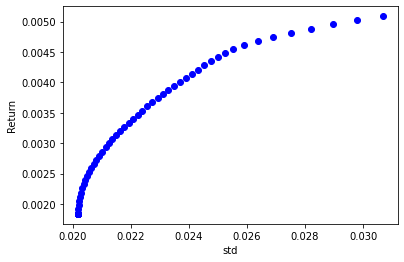

In [5]:
# plot the efficient frontier
plot_efficient_frontier(R,C,100)
plt.show()

In [6]:
# market portfolio when risk-free rate equals 0
find_market_portfolio(R,C,rf=0.0)

array([0.        , 0.        , 0.        , 0.43895826, 0.56104174])

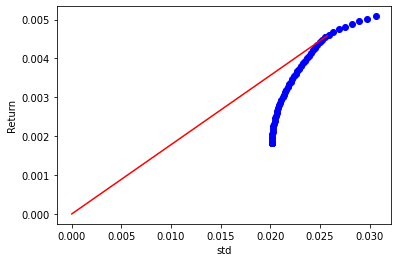

sharpe for risk free overnigh 0: 0.17820357496807757


In [7]:
# plot of the sharpe ratio and overall efficient frontier
rf = 0
plot_efficient_frontier(R,C,100)
w_best = find_market_portfolio(R,C,rf,100)
plt.plot([0,np.sqrt(w_best.T@C@w_best)],[rf,w_best@R],color="red")
plt.show()
print(f"sharpe for risk free overnigh {rf}:",(w_best@R-rf)/np.sqrt(w_best.T@C@w_best))

## Effect of the Risk-Free Rate 
The risk free rate changes the market portfolio. Below, consider the changing risk-free rate as available (or mandatory for negative rates) by a single agent since the changing publicly available risk-free rate changes the expected returns and variances in real life.

In [ ]:
rf_set = np.linspace(0,max(R)-1e-8,30)
portfolio_set = [find_market_portfolio(R,C,rf,30,epsilon=-1e-7) for rf in rf_set] 
return_set = [x@R for x in portfolio_set]
std_set = [np.sqrt(x.T@C@x) for x in portfolio_set]
sharpe_set = [sharpe(x,rf,C,R) for x in portfolio_set]

In [ ]:
fig = px.line_3d(x=rf_set, y=std_set, z=return_set,
                 labels={"x":"risk-free rate","y":"std (without rf)","z":"return (without rf)"})
fig.show()